### Exploratory Data Analysis for Stock Market: AAPL

### Data Cleaning and Preprocessing

In [81]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,07/17/2023,$193.99,50520160,$191.90,$194.32,$191.81
1,AAPL,07/14/2023,$190.69,41616240,$190.23,$191.1799,$189.63
2,AAPL,07/13/2023,$190.54,41342340,$190.50,$191.19,$189.78
3,AAPL,07-12-2023,$189.77,60750250,$189.68,$191.70,$188.47
4,AAPL,07-11-2023,$188.08,46638120,$189.16,$189.30,$186.60


In [82]:
print(df.columns.tolist())

['Company', 'Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']


In [83]:
print(df[df['Date'].isna()])
print(df['Date'].dtype)

Empty DataFrame
Columns: [Company, Date, Close/Last, Volume, Open, High, Low]
Index: []
object


Based on the head and column names and type displayed, we can: 
1) Remove the dollar sign from certain columns
2) Standardize the Date column. 
3) Sort Data by Date per Company (we don't need to change the type since it will already be datetime64 when we standardize the date column and drop missing values). 
4) Convert Volume to numeric (just in case it is string)
5) Drop rows with missing values for Date

In [84]:
# 1) Remove $ and convert to float
price_cols = ['Close/Last', 'Open', 'High', 'Low']
for col in price_cols:
    df[col] = df[col].replace({r'\$': ''}, regex=True).astype(float)

# 2) Standardize Data column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 3) Sort by Company and Date
df = df.sort_values(by=['Company', 'Date']).reset_index(drop=True)

# 4) Convert Volume to numeric (in case it's string)
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

# Quick check
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low
0,AAPL,2013-07-18,15.4199,218632537,15.4779,15.5311,15.3789
1,AAPL,2013-07-19,15.1768,268548901,15.4679,15.4993,15.1554
2,AAPL,2013-07-22,15.2254,207648981,15.3379,15.3482,15.1953
3,AAPL,2013-07-23,14.9639,354477618,15.2143,15.2486,14.9539
4,AAPL,2013-07-24,15.7325,591624923,15.6761,15.8782,15.5450


In [85]:
print(df[df['Date'].isna()])

      Company Date  Close/Last     Volume      Open      High       Low
1523     AAPL  NaT    189.7700   60750250  189.6800  191.7000  188.4700
1524     AAPL  NaT    188.0800   46638120  189.1600  189.3000  186.6000
1525     AAPL  NaT    188.6100   59922160  189.2600  189.9900  187.0350
1526     AAPL  NaT    190.6800   46815000  191.4100  192.6700  190.2400
1527     AAPL  NaT    191.8100   45156010  189.8400  192.0200  189.2000
...       ...  ...         ...        ...       ...       ...       ...
25155    TSLA  NaT      8.9487  267278866    9.4593    9.4633    8.8240
25156    TSLA  NaT      9.4767  138783801    9.6500    9.7153    9.4067
25157    TSLA  NaT      9.6453  152562224    9.3340    9.6593    9.3100
25158    TSLA  NaT      9.2000   93317338    8.9727    9.2167    8.9073
25159    TSLA  NaT      9.0367   79612325    9.0000    9.1013    8.8421

[9930 rows x 7 columns]


In [86]:
df = df.dropna(subset=['Date'])

### Section I: Long Term Price Trend and Growth Behavior

**Key Questions Answered in This Section**

### Question 1: How has Apple's price evolved over the years?
Apple has shown consistent growth since 2013, and it continues to grow well into 2023. There has been a strong decline from late 2018 - early 2019. 2022 has also been a year of complete decline. With growth, the company's stock also seems to be increasing in volatility. 

### Question 2: Are there long-term growth phases or correction phases?**
2014, 2016, 2017, 2019, 2020, 2021, 2023 are the growth phases. 
2015 and 2022 have been correction phases. 
There isn't enough data to conclude anything about 2013. 

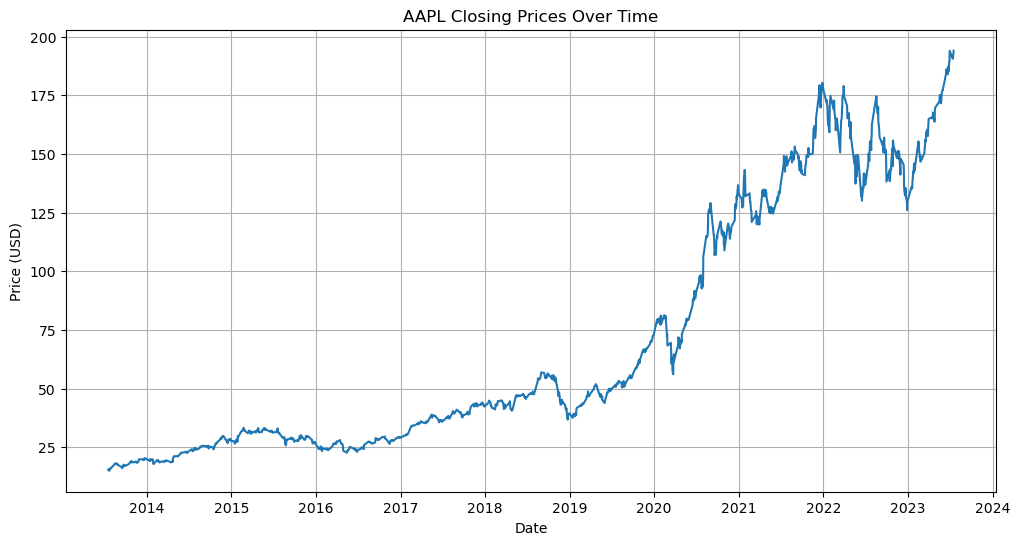

In [87]:
import matplotlib.pyplot as plt

apple_df = df[df['Company'] == 'AAPL']
plt.figure(figsize=(12, 6))
plt.plot(apple_df['Date'], apple_df['Close/Last'])
plt.title('AAPL Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

**Figure I: Long-Term Price Plot**

This time series plot shows Apple's stock price evolution over the 10-year period:

- AAPL demonstrates consistent long-term growth, with prices rising from under $20 in 2013 to nearly $200 by 2023.
- The stock shows periods of accelerated growth starting around 2019, reflecting strong financial performance, product launches, and favorable market sentiment.
- Temporary corrections are visible in 2021–2022, likely corresponding to broader market volatility and macroeconomic factors.
- By 2023, AAPL reaches new historical highs, highlighting its continued leadership in the technology sector and strong investor confidence.
- Overall, the trend reflects Apple's sustained growth and resilience over a full decade. 

In [88]:
print(df.info())
print(df.describe())
print(df['Company'].unique())
print(df['Date'].min(), df['Date'].max())

<class 'pandas.core.frame.DataFrame'>
Index: 15230 entries, 0 to 24166
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Company     15230 non-null  object        
 1   Date        15230 non-null  datetime64[ns]
 2   Close/Last  15230 non-null  float64       
 3   Volume      15230 non-null  int64         
 4   Open        15230 non-null  float64       
 5   High        15230 non-null  float64       
 6   Low         15230 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 951.9+ KB
None
                                Date    Close/Last        Volume  \
count                          15230  15230.000000  1.523000e+04   
mean   2018-07-13 04:03:56.375574528    102.159568  5.158167e+07   
min              2013-07-18 00:00:00      1.620000  1.143952e+06   
25%              2016-01-14 00:00:00     36.320000  1.206571e+07   
50%              2018-07-18 00:00:00 

### Section 2: Seasonality & Cyclical Patterns

**Key Questions Answered in This Section**

### Question 3: Are there months where Apple performs consistently stronger or weaker?
Yes — Apple's stock exhibits moderate monthly performance variation when averaged across the years:
Stronger months:
March, April, June, and December show higher average closing prices.
These months likely benefit from positive investor sentiment, product cycles, or end-of-year rallies.
Weaker months:
July, August, September, and October tend to have lower or flatter average prices.
This may reflect seasonal lulls (e.g. post-earnings corrections or summer trading slowdowns).
These results were consistent across:
The monthly average line plot
The boxplot showing distribution shape and medians

### Question 4: Is there any seasonality in the stock across years?
There is some evidence of seasonality, though it's not strongly cyclical.
The heatmap of monthly averages by year shows:
A clear long-term upward trend from 2013 to 2023
No single month that is consistently lowest or highest across every year
The seasonal shape is more noticeable in recent years, with Q2 and Q4 often stronger
This suggests that while Apple grows steadily over time, month-over-month seasonal effects are subtle compared to broader trend movements.

### Question 5: Do certain months show higher volatility or stronger trends?
Yes — the boxplot distribution gives a first view of this:
April, June, and December show wider interquartile ranges and longer upper whiskers, suggesting:
More upward momentum or positive skew
Occasional sharp rallies during these months
July shows a narrower range, implying:
Lower volatility and more stable or sideways movement

In [89]:
# Extract Month and Year
apple_df = apple_df.copy()  # Make an independent copy

apple_df['Year'] = apple_df['Date'].dt.year
apple_df['Month'] = apple_df['Date'].dt.month
apple_df['MonthName'] = apple_df['Date'].dt.strftime('%b')

apple_df['Month'] = apple_df['Date'].dt.month
apple_df['MonthName'] = apple_df['Date'].dt.strftime('%b')

### Monthly Average Across All Years

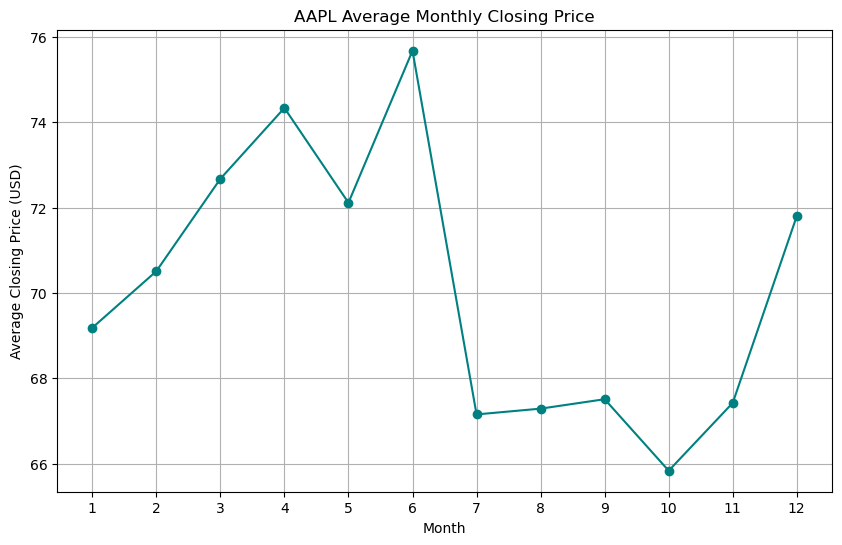

In [90]:
# Group by month across all years
monthly_avg = apple_df.groupby('Month')['Close/Last'].mean()

# Plot average closing price for each month
plt.figure(figsize=(10,6))
monthly_avg.plot(marker='o', color='teal')
plt.title('AAPL Average Monthly Closing Price')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (USD)')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()

Upward slope from Jan → Jun, peaking in June, suggesting:
Stronger performance in the first half of the year.
Steep drop from June → July, continuing flat through Q3 (July–Sept).
Slight recovery starting October → December, ending on a high in December.

The closing price tends to peak in June - which can be possibly linked to students preparing to go back to school (however more analysis is required to know anything), and is at its lowest in the month of October. More analysis is required to fully understand why this is the pattern that emerges. 

### Boxplot of Monthly Distributions

/var/folders/lb/f3b536210ps6wln9hv1kbqxm0000gn/T/ipykernel_29655/1205165279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonthName', y='Close/Last', data=apple_df,


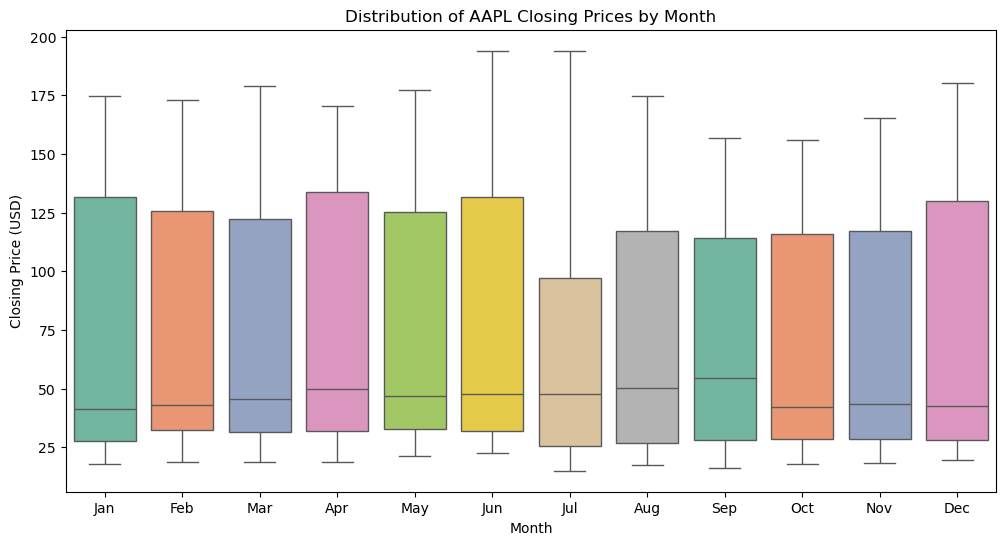

In [91]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(x='MonthName', y='Close/Last', data=apple_df, 
            order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
            palette='Set2')
plt.title('Distribution of AAPL Closing Prices by Month')
plt.xlabel('Month')
plt.ylabel('Closing Price (USD)')
plt.show()

All months show signs of positive skew — median is lower in the box, longer whiskers to the top.

July appears more symmetric and compressed — lower volatility month. However, the outlier tend to be very out of range in this case. 

This skewed shape aligns with Apple’s history of occasional sharp upward moves (e.g., during earnings, product launches). There's potential for the stocks to be a lot higher than the median. 

Certain months (like April, June, and December) tend to have slightly higher closing medians and wider spread, indicating more price action.

### Heatmap of Monthly Average Across Years

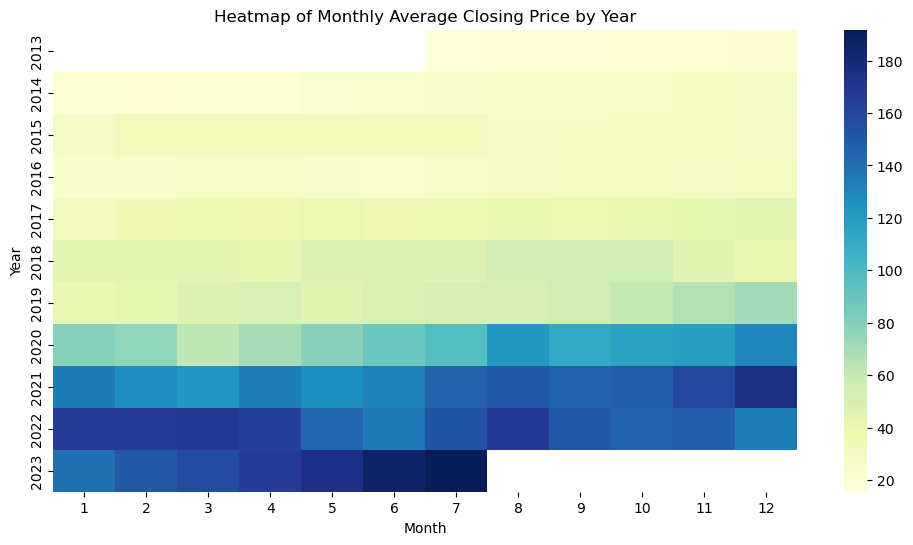

In [92]:
# Create pivot table of average monthly price per year
monthly_year_avg = apple_df.groupby(['Year','Month'])['Close/Last'].mean().unstack()

plt.figure(figsize=(12,6))
sns.heatmap(monthly_year_avg, cmap='YlGnBu', annot=False, fmt=".1f")
plt.title('Heatmap of Monthly Average Closing Price by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

Clear upward trend over years:

Color transitions from light yellow (low price) to deep blue (high price) as years progress.

Confirms Apple’s steady price growth, especially post-2020.

2022 stands out as a strong year across nearly all months — very dark blue shades.

Mid-2023 (July) appears to be the peak month in terms of average price (possibly near all-time high).

The visual shows seasonal stability:

Prices rise steadily throughout each year

No specific month stands out as systematically "weak" across all years

###  Section 3: Volatility Analysis

**Key Questions Answered in this Section**

### Question 6: How volatile is Apple’s stock over time? 
Apple’s stock showed moderate volatility until 2020, after which volatility increased substantially — visible in the widening Bollinger Bands. This reflects both pandemic-era instability and post-2020 tech stock surges.

### Question 7: When does price deviate strongly from its average? 
Major deviations occurred during the 2020 market crash and the 2021 bull run, where prices moved beyond the typical ±2σ range defined by the bands. These moments often preceded trend shifts or temporary corrections.

### Question 8: Can we visualize "normal" vs "extreme" price zones?  
Yes. The area between the Bollinger Bands captures the “normal” price behavior, while any break above or below indicates an “extreme” movement. This helps highlight periods of unusually high volatility or market sentiment shifts.

### Rolling Mean and St Dev

A rolling mean (or moving average) smooths out short-term fluctuations in data by taking the average of values over a fixed-size window as it moves forward in time.

A 20-day rolling mean takes the average closing price of the last 20 days, for each day.

It updates each day by "rolling forward" one day, dropping the oldest value and including the newest.

Purpose:
Helps visualize trends over time.

Removes short-term noise.

In [93]:
# Ensure data is sorted
apple_df = apple_df.sort_values('Date')

# 20-day rolling mean and std
apple_df['Rolling_Mean'] = apple_df['Close/Last'].rolling(window=20).mean()
apple_df['Rolling_STD'] = apple_df['Close/Last'].rolling(window=20).std()

### Bollinger Bands

Bollinger Bands are volatility bands placed above and below a moving average. They show how much the price is deviating from the average, based on standard deviation.

Components:
Rolling Mean (Middle Band): A 20-day moving average.

Upper Band = Rolling Mean + (2 × Standard Deviation)

Lower Band = Rolling Mean − (2 × Standard Deviation)

Purpose:
The bands widen when volatility increases.

The bands contract during stable periods.

They help detect overbought or oversold conditions:

If price breaks above the upper band → may be overbought

If price drops below the lower band → may be oversold

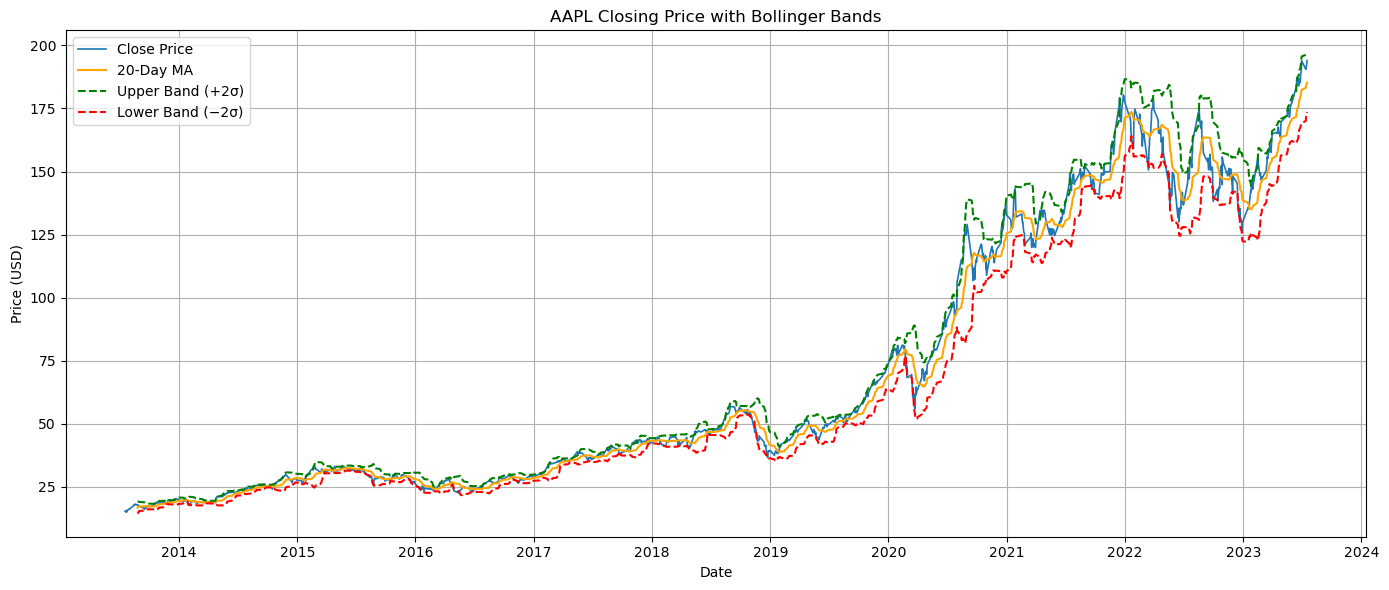

In [94]:
# Bollinger Bands: ±2 standard deviations
apple_df['Upper_Band'] = apple_df['Rolling_Mean'] + 2 * apple_df['Rolling_STD']
apple_df['Lower_Band'] = apple_df['Rolling_Mean'] - 2 * apple_df['Rolling_STD']

# Plot
plt.figure(figsize=(14,6))
plt.plot(apple_df['Date'], apple_df['Close/Last'], label='Close Price', linewidth=1.2)
plt.plot(apple_df['Date'], apple_df['Rolling_Mean'], label='20-Day MA', color='orange')
plt.plot(apple_df['Date'], apple_df['Upper_Band'], label='Upper Band (+2σ)', color='green', linestyle='--')
plt.plot(apple_df['Date'], apple_df['Lower_Band'], label='Lower Band (−2σ)', color='red', linestyle='--')

plt.title('AAPL Closing Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Price mostly stays within the bands, as expected — this is the "normal range."

When price touches or breaks upper band:

Examples: late 2020, 2021

Implies momentum rallies or potentially overbought zones.

When price touches lower band:

Corrections or panic sell-offs (e.g., COVID dip in 2020).

Band width changes:

Narrow bands (e.g., 2016–2019) = low volatility.

Wide bands (2020–2022) = high volatility (rapid gains and drops). 

### Section 4: Momentum

**Key Questions Answered in this Section**

### Question 9: When is Apple overbought or oversold?

Overbought (RSI > 70)

Apple consistently hits RSI > 70 during strong rallies (e.g., 2017, 2020, late 2022).

These peaks typically precede short-term pullbacks — suggesting cooling periods after strong momentum.

Oversold (RSI < 30)

Notable dips include:

Late 2018 (marketwide correction)

March 2020 (COVID crash)

Mid-2022 (tech sector dip)

These zones often align with good long-term entry points, as they preceded recoveries.

### Question 10: Is there any cyclical pattern in Apple's strength/weakness?

Apple’s RSI oscillates fairly regularly, reflecting cyclical investor sentiment.

RSI confirms that Apple undergoes:

Consistent rally–pullback cycles

Periods of momentum exhaustion

Followed by consolidation or rebounds

This helps time momentum, especially when combined with Bollinger Bands.

### RSI — Relative Strength Index

The RSI measures the strength and speed of recent price movements.

It helps identify whether a stock is overbought or oversold.

Values range from 0 to 100:

Above 70 = overbought (price may fall soon)

Below 30 = oversold (price may rise soon)

Default calculation: 14-day window

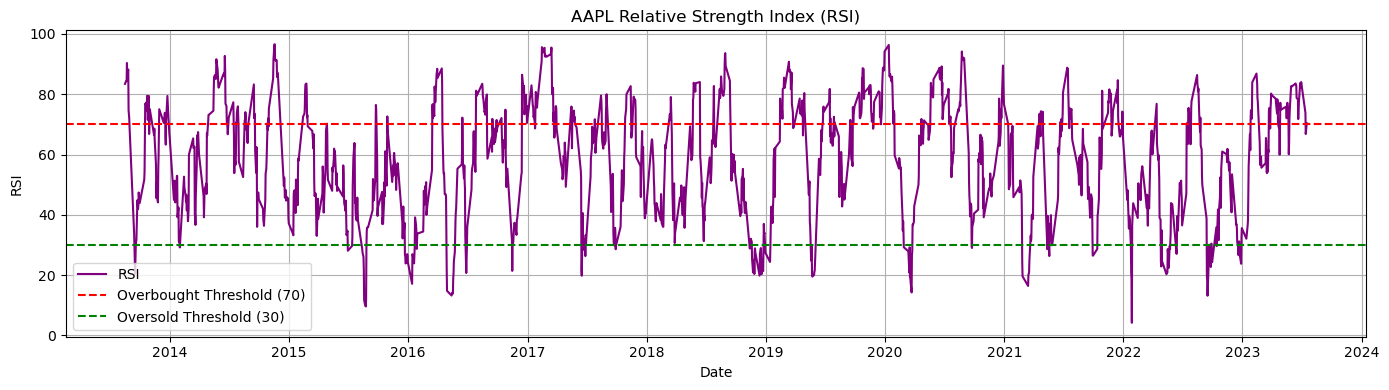

In [95]:
# Calculate RSI

# Calculate daily price change
delta = apple_df['Close/Last'].diff()

# Separate gains and losses
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# Rolling 14-day averages
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

# Compute RS and RSI
rs = avg_gain / avg_loss
apple_df['RSI'] = 100 - (100 / (1 + rs))

# Plot RSI
plt.figure(figsize=(14,4))
plt.plot(apple_df['Date'], apple_df['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought Threshold (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold Threshold (30)')
plt.title('AAPL Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The Relative Strength Index (RSI) is a momentum oscillator that highlights whether Apple is overbought or oversold.

- RSI > 70: Indicates overbought conditions (e.g., late 2020, early 2022)
- RSI < 30: Indicates oversold zones (e.g., COVID crash in 2020, mid-2022 dip)

These thresholds often align with key turning points in Apple’s price action. RSI’s regular oscillation shows a pattern of momentum build-up followed by brief corrections — confirming Apple’s cyclical growth behavior.

Used in conjunction with Bollinger Bands and moving averages, RSI provides an effective lens for understanding **price pressure and timing signals**. 

### Section 5: Trend reversals

**Key Questions Answered in this Section**

### Question 11: Is the current price trend strengthening or weakening?

MACD confirmed strong upward momentum in:
Mid-2020 to late 2021
And momentum loss during:
Mid-2022 to early 2023

### Question 12: Are there clear signs of trend reversals?

Bullish reversals: MACD crossed above signal (e.g., late 2019, mid-2020, early 2023)

Bearish shifts: MACD fell below signal (e.g., early 2022)

These crossover points acted as leading indicators of trend changes.

### Question 13: How strong is the momentum (up or down)?

Large histogram bars = fast-moving price trends
→ Histogram spiked massively during the 2020 rally
→ deep troughs in 2022 = aggressive pullbacks

### MACD – Moving Average Convergence Divergence

MACD measures the difference between two exponential moving averages (EMAs) of a stock’s closing price:

MACD Line = 12-day EMA − 26-day EMA

Signal Line = 9-day EMA of the MACD line

MACD Histogram = MACD Line − Signal Line

When MACD > Signal → bullish momentum (uptrend gaining strength)

When MACD < Signal → bearish momentum (downtrend strengthening)

Crossovers are trading signals:

MACD crossing above signal → buy signal

MACD crossing below signal → sell signal

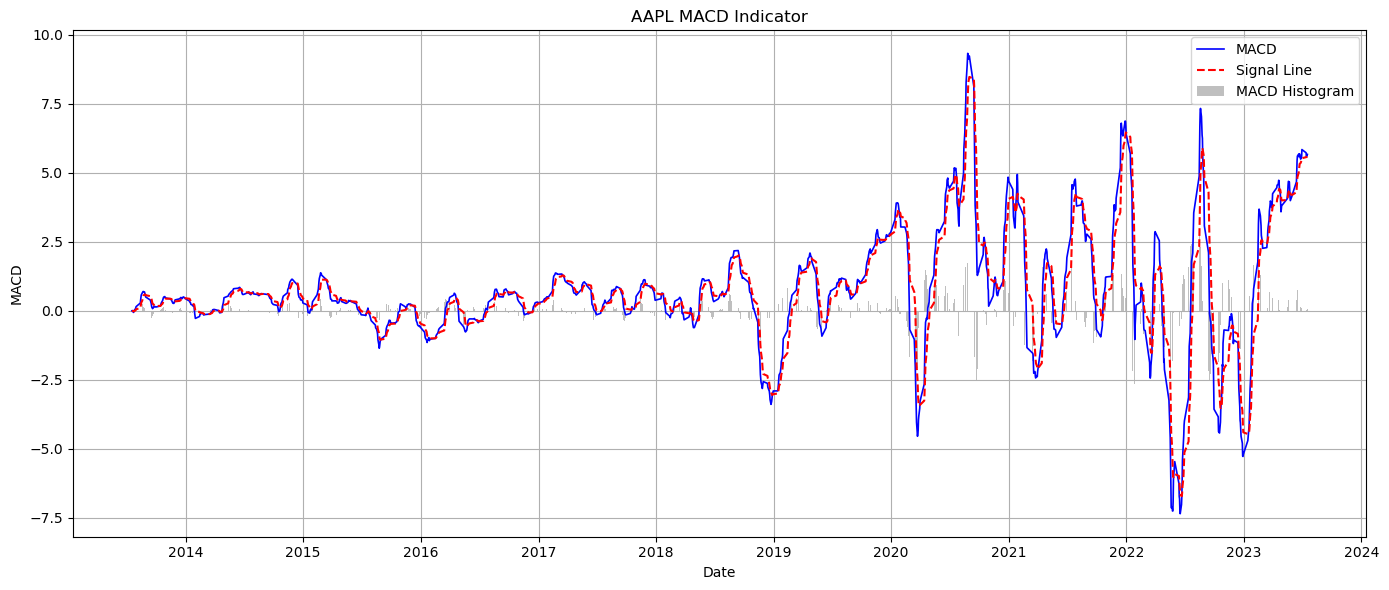

In [96]:
# Compute the EMAs
ema_12 = apple_df['Close/Last'].ewm(span=12, adjust=False).mean()
ema_26 = apple_df['Close/Last'].ewm(span=26, adjust=False).mean()

# Calculate MACD and Signal Line
apple_df['MACD'] = ema_12 - ema_26
apple_df['Signal_Line'] = apple_df['MACD'].ewm(span=9, adjust=False).mean()
apple_df['MACD_Hist'] = apple_df['MACD'] - apple_df['Signal_Line']

plt.figure(figsize=(14,6))

# MACD and Signal Line
plt.plot(apple_df['Date'], apple_df['MACD'], label='MACD', color='blue', linewidth=1.2)
plt.plot(apple_df['Date'], apple_df['Signal_Line'], label='Signal Line', color='red', linestyle='--')

# Histogram bars
plt.bar(apple_df['Date'], apple_df['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.5)

plt.title('AAPL MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The MACD indicator is used to assess Apple’s trend direction and momentum over time.

- The MACD line reflects the difference between short- and long-term momentum.
- The signal line helps identify turning points.
- The histogram shows how strong and fast the momentum is changing.

Key signals:
- MACD crossing above the signal line (e.g., mid-2020, early 2023) indicates bullish momentum.
- MACD crossing below (e.g., mid-2022) reflects weakening trends or reversals.
- High histogram peaks and troughs correspond with Apple’s most volatile periods.

MACD is especially valuable when used with RSI and Bollinger Bands, reinforcing signals around **trend continuation or reversal**. 

**Volume Analysis**

What is Trading Volume? 
Trading Volume is the total number of shares traded for a company on a specific day.

If 1 million shares of AAPL were bought and sold on July 10, 2023, then the volume for that day is 1,000,000.

It shows how active the stock was that day.

It's a key liquidity and interest indicator.

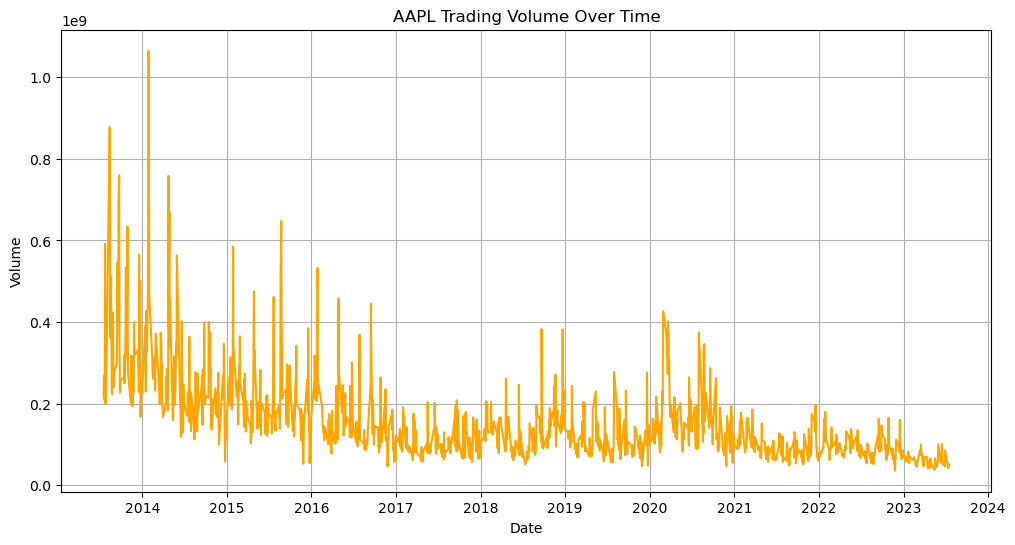

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(apple_df['Date'], apple_df['Volume'], color='orange')
plt.title('AAPL Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

**Figure II: AAPL Trading Volume Over Time**

- Trading volume was significantly higher in the earlier years (2013–2015), occasionally surpassing 1 billion shares traded in a single day.
- After 2015, there is a noticeable decline in overall daily trading volume, reflecting a possible stabilization in investor behavior or reduced speculative activity.
- Volume spikes still occur periodically, often corresponding to earnings announcements, product launches, or major news events.
- By 2020–2023, trading volumes are generally lower and more stable, although short-term surges remain visible.
- The plot highlights how trading volume can reflect both long-term trends and short-term market reactions. 

**Daily Returns**
We compute daily returns to analyze stock volatility and performance over time. 

In [98]:
df['Daily_Return'] = df.groupby('Company')['Close/Last'].pct_change() * 100
df.head()

,Company,Date,Close/Last,Volume,Open,High,Low,Daily_Return
0,AAPL,2013-07-18,15.4199,218632537,15.4779,15.5311,15.3789,NaN
1,AAPL,2013-07-19,15.1768,268548901,15.4679,15.4993,15.1554,-1.576534
2,AAPL,2013-07-22,15.2254,207648981,15.3379,15.3482,15.1953,0.320226
3,AAPL,2013-07-23,14.9639,354477618,15.2143,15.2486,14.9539,-1.717525
4,AAPL,2013-07-24,15.7325,591624923,15.6761,15.8782,15.5450,5.136362
